# Imports et téléchargement du fichier CIF

In [2]:
#imports
from pymatgen.ext.matproj import MPRester
from pymatgen.phonon.bandstructure import *
from pymatgen.phonon.plotter import PhononBSPlotter
import matplotlib.pyplot as plt
import numpy as np
import math
import matplotlib.image as img

#telechargement du fichier cif de mp-1367
with MPRester("hJ9SDZIQUxgk5cVi") as m:

    # Structure of bands of phonons for material id
    strucPhonon =  m.get_phonon_bandstructure_by_material_id("mp-1367")

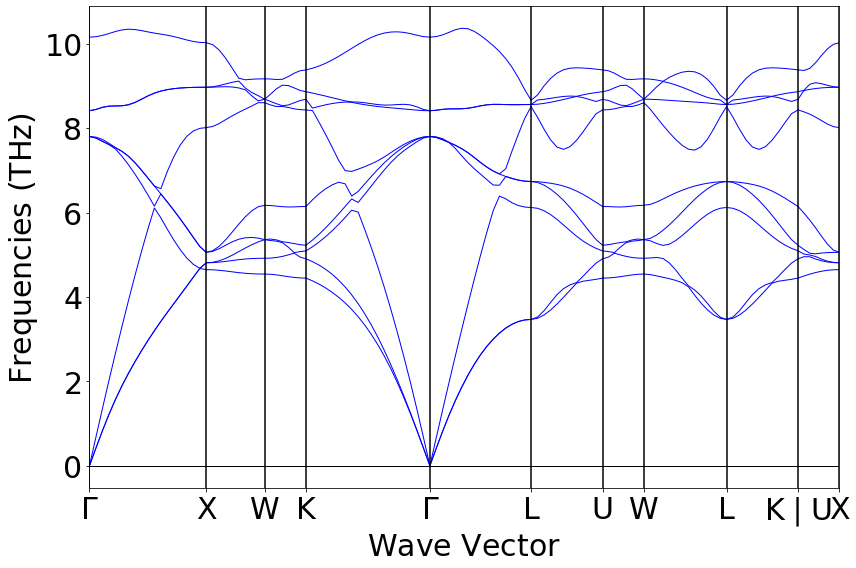

Zone de Brillouin :


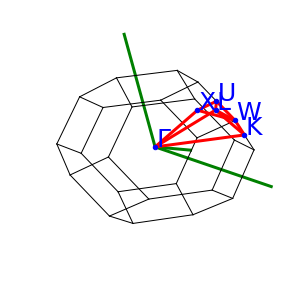

In [3]:
# graphique structure
phonon_plotter = PhononBSPlotter(strucPhonon)
phonon_plotter.get_plot()
plt.show()
# graphique zone de brillouin
print("Zone de Brillouin :")
phonon_plotter.plot_brillouin()

# Choix de 3 branches acoustiques différentes dans 3 directions différentes de la zone de Brillouin

In [4]:
#récupération des données 
data = phonon_plotter.bs_plot_data() #récupération des données nécessaires
dist = data.get("distances")
freq = data.get("frequency")

#les 3 distances choisies
q1 = dist[0]
q2 = dist[3]
q3 = dist[4]

#les fréquences correspondantes
freq1 = freq[0][0]
freq2 = freq[3][1]
freq3 = freq[4][2]

# approximation de la pente pour la premiere branche choisie
x1 = np.array([q1[0],q1[1]])
y1 = np.array([freq1[0],freq1[1]])
coef1 = np.polyfit(x1,y1,1)
a1 = np.linspace(q1[0],q1[-1],1000)
d1 =coef1[0]*a1+coef1[1]

# approximation de la pente pour la deuxieme branche choisie
x2 = np.array([q2[-1],q2[-2]])
y2 = np.array([freq2[-1],freq2[-2]])
coef2 = np.polyfit(x2,y2,1)
a2 = np.linspace(q2[0],q2[-1],1000)
d2 =coef2[0]*a2+coef2[1]

# approximation de la pente pour la troisieme branche choisie
x3 = np.array([q3[0],q3[1]])
y3 = np.array([freq3[0],freq3[1]])
coef3 = np.polyfit(x3,y3,1)
a3 = np.linspace(q3[0],q3[-1],1000)
d3 =coef3[0]*a3+coef3[1]

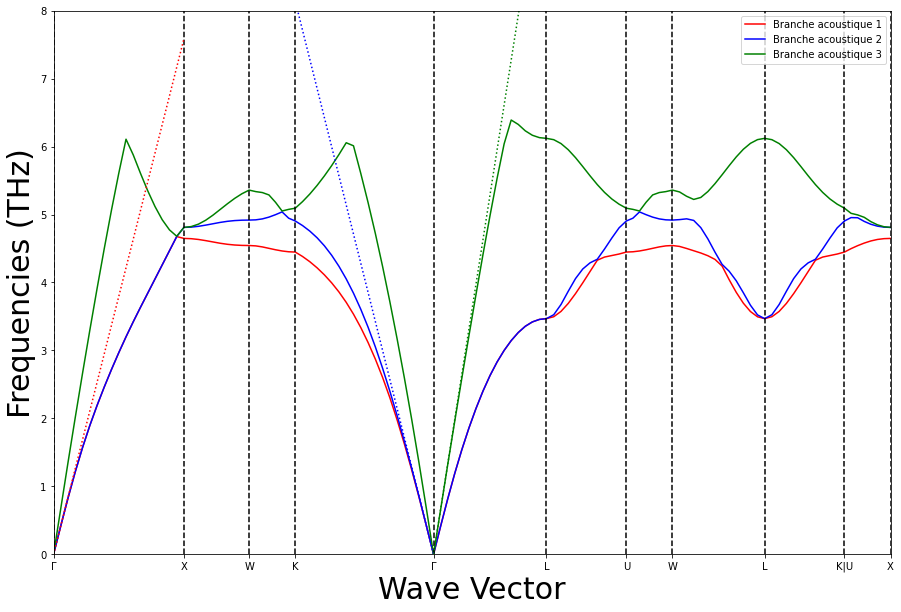

In [5]:
#affichage du graphique
x = [y for b in dist for y in b]

f1 = freq[0][0]
for i in range(1,10):
    f1 = np.concatenate((f1,freq[i][0]))

f2 = freq[0][1]
for i in range(1,10):
    f2 = np.concatenate((f2,freq[i][1]))

f3 = freq[0][2]
for i in range(1,10):
    f3 = np.concatenate((f3,freq[i][2]))

#tracage des branches acoustiques
plt.figure(figsize=(15,10)) 
plt.plot(x,f1,color='r',label='Branche acoustique 1')
plt.plot(x,f2,color='b',label='Branche acoustique 2')
plt.plot(x,f3,color='g',label='Branche acoustique 3')

di = data.get('ticks').get('distance')
bands = [di[0],di[1],di[3],di[5],di[7],di[9],di[11],di[13],di[15],di[17],di[18]]
plt.xticks(bands,['\u0393',"X","W","K",'\u0393',"L","U","W","L","K|U","X"])

for d in bands :
    plt.axvline(d,color='black',ls='--')
    
plt.axis([0,di[-1],0,8])
plt.legend()
plt.xlabel("Wave Vector",fontsize=30)
plt.ylabel("Frequencies (THz)",fontsize=30)

plt.plot(a1,d1,color='r',ls=':')
plt.plot(a2,d2,color='b',ls=':')
plt.plot(a3,d3,color='g',ls=':')

plt.show()

La branche acoustique 1 (en rouge) est dans la direction $\Gamma$ - X.  <br>
La branche acoustique 2 (en bleu) est dans la direction K - L. <br>
La branche acoustique 3 (en vert) est dans la direction $\Gamma$ - L. <br>
Les droites en pointilé sont les approximations des différentes branches acoustiques lorsque $\omega$ tend vers 0. Les valeurs des pentes des droites en pointilés seront ensuite utilisées pour calculer la vitesse du son car elles sont le rapport entre la fréquence et la longueur d'onde $q$. 

# Calcul de la vitesse du son pour les 3 branches acoustiques 

Afin de calculer la vitesse du son, j'utilise la relation de dispersion qui est : 
$\omega = v_{s} q $ ce qui donne $v_{s} =  \frac{\omega}{ q} $     <br>
Lorsque $\omega$ tend vers 0, $v_{s} = \frac{d\omega}{dq}$ dont la valeur est égale à la pente de la branche acoutisque choisie à quelques facteurs près.  <br>
J'utilise un facteur A = $10^{-10}$ pour convertir les mesures en Angstrom en mètres.  <br>
J'utilise également le facteur B = $10^{12}$ pour convertir les fréquences de THz en Hz.  <br>
Le facteur 2 $\pi$ permet de passer d'une fréquence à une vitesse angulaire car $\omega = 2 \pi f$.

In [7]:
A = 1e-10
B = 1e12
print("Vitesse du son pour la branche acoustique 1 est de ", 2*math.pi*math.fabs(coef1[0])*A*B, "[m/s]")
print("Vitesse du son pour la branche acoustique 2 est de ", 2*math.pi*math.fabs(coef2[0])*A*B, "[m/s]")
print("Vitesse du son pour la branche acoustique 3 est de ", 2*math.pi*math.fabs(coef3[0])*A*B, "[m/s]")

Vitesse du son pour la branche acoustique 1 est de  4801.199808066576 [m/s]
Vitesse du son pour la branche acoustique 2 est de  4855.049486713137 [m/s]
Vitesse du son pour la branche acoustique 3 est de  7728.178178740785 [m/s]
